# Linear Regression (continued)

In a [previous report](https://github.com/marty-vanhoof/Maching_Learning/blob/master/Linear_Regression/Linear_Regression.ipynb), we went into some detail about linear regression and the batch gradient descent algorithm.  We also worked through an example in the case of simple linear regression where we had 1 feature and we were trying to fit a line to the data.  Now we will consider multiple linear regression where we have at least 2 features, which means we are trying to fit a hyperplane to the data in higher dimensions.  

A picture for the case of 2 features is shown below 

<img src="least_squares_plane.png">
<br/>

...

In [81]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
filepath = os.getcwd() + '/ex1data2.txt'
df = pd.read_csv(filepath, names = ['size', 'bedrooms', 'price'])
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [83]:
# column means and standard deviations
print( 'column means: \n', df.mean().to_string() )
print()
print( 'column standard deviations: \n', df.std().to_string() )

column means: 
 size          2000.680851
bedrooms         3.170213
price       340412.659574

column standard deviations: 
 size           794.702354
bedrooms         0.760982
price       125039.899586


In [84]:
# standardize each column
df = ( df - df.mean() ) / df.std()
df.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [85]:
# insert column of ones
df.insert(0, 'ones', 1)

# get the training data X, target variable y, and intialize theta to (0,0,0)
X = df[['ones', 'size', 'bedrooms']]
y = df['price']
theta = np.array([0,0,0])

# transform X, y, theta into numpy matrices
X, y, theta = np.matrix(X), np.matrix(y).T, np.matrix(theta)

### Finding a Good Learning Rate

Remember that the objective of the gradient descent algorithm is to minimize the cost function $J(\theta)$. The learning rate $\alpha$ controls how fast the algorithm converges.  For a smaller $\alpha$, the algorithm takes longer to converge to the optimal value of $J(\theta)$.  If $\alpha$ is too large, $J(\theta)$ can get very large and diverge.  Let's look at some plots to see how $J(\theta)$ changes according to the number of iterations and for several different values of $\alpha$.

The graph below shows that $J(\theta)$ converges more slowly when $\alpha = 0.01$ and much faster when $\alpha = 0.3$.

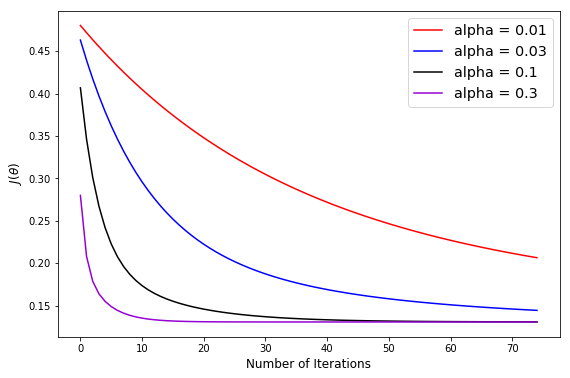

In [86]:
from collections import defaultdict
from lin_reg_scripts import gradient_descent

def cost_hist(alpha_vals, num_iterations):
    '''Make a dictionary of cost histories for different values
    of the learning rate alpha.  Each dict key is an alpha value
    and each dict value is a list consisting of the values of the
    cost function for each iteration of gradient_descent()'''
    
    hist_dict = defaultdict()
    for alph in alpha_vals:
        hist = gradient_descent(X, y, theta, alph, num_iterations)[1]
        hist_dict[alph] = hist
    
    return hist_dict 

num_iter = 75
# alpha values and colours for the plot
a_vals = [0.01, 0.03, 0.1, 0.3] 
colours = ['red', 'blue', 'black', 'darkviolet']
# all the cost histories to use for the plot
c_hist = cost_hist(a_vals, num_iter)

# make the plot
fig, ax = plt.subplots( figsize = (9,6) )
for alph, colour in zip(a_vals, colours):
    ax.plot( np.arange(num_iter), c_hist[alph], colour, label = 'alpha = {}'.format(alph) )

ax.legend(fontsize = 'x-large')
ax.set_xlabel('Number of Iterations', fontsize=12)
ax.set_ylabel(r'$J(\theta)$', fontsize=12)
plt.show()

### Performing the Linear Regression

According the the above graph with a learning rate $\alpha = 0.3$, the cost function $J(\theta)$ will converge to the optimal value very quickly (it seems to get close after only 20-30 iterations).  Let's run the gradient descent algorithm with 75 iterations to try and squeeze the most juice out of it.  After a certain point, there will be very little movement in $J(\theta)$, but 75 iterations isn't very much.

In [105]:
# run gradient_descent() with the parameters below
alpha = 0.3
num_iterations = 75
theta_fit, cost_hist = gradient_descent(X, y, theta, alpha, num_iterations)

# get theta_fit parameters
theta_0 = theta_fit[0,0]
theta_1 = theta_fit[0,1]
theta_2 = theta_fit[0,2]

print('theta_fit = ', theta_fit, '\n')
print('theta_fit components: ', theta_0, theta_1, theta_2, '\n')
print('J(theta_fit) = ', cost_hist[num_iterations-1])

theta_fit =  [[ -1.17961196e-16   8.84751367e-01  -5.31641983e-02]] 

theta_fit components:  -1.17961196366e-16 0.884751366522 -0.0531641983302 

J(theta_fit) =  0.130686480631


### Interpreting and Visualizing the Results

So after 75 iterations, the algorithm returns the fitted parameters 

$$ \theta_0 \approx 0\,, \quad \theta_1 = 0.88475\,, \quad \theta_2 = -0.05316\,. $$

Therefore, the linear function that best fits the data is

$$
\begin{array}{11}
h_\theta(\mathbf{x})& = \quad \theta_0 + \theta_1 x_1 + \theta_2 x_2 \\
& \approx \quad 0.88475 x_1 - 0.05316 x_2 
\end{array}
$$

In other words, this means that according to our model, we can predict the price of a house by 

$$ \mathrm{price} \approx 0.88475 \ast \mathrm{size} - 0.05316 \ast \mathrm{bedrooms} $$

Recall that the data are standardized, so the units for "price", "size", and "bedrooms" are the number of standard deviations these variables are from their respective means.  The graph of this linear function with the training data is given below

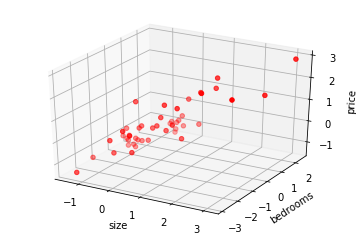

In [144]:
from mpl_toolkits.mplot3d import Axes3D

x = df['size']
y = df['bedrooms']
z = df['price']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( df['size'], df['bedrooms'], df['price'], c='red', marker='o' )
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()

In [133]:
df['bedrooms']

0    -0.223675
1    -0.223675
2    -0.223675
3    -1.537767
4     1.090417
5     1.090417
6    -0.223675
7    -0.223675
8    -0.223675
9    -0.223675
10    1.090417
11   -0.223675
12   -0.223675
13    2.404508
14   -0.223675
15    1.090417
16   -1.537767
17   -0.223675
18    1.090417
19    1.090417
20   -0.223675
21   -1.537767
22   -0.223675
23    1.090417
24   -0.223675
25   -0.223675
26   -0.223675
27   -0.223675
28   -0.223675
29   -0.223675
30   -1.537767
31   -2.851859
32    1.090417
33   -0.223675
34    1.090417
35   -0.223675
36   -0.223675
37    1.090417
38    1.090417
39    1.090417
40   -1.537767
41   -0.223675
42    1.090417
43   -0.223675
44   -1.537767
45    1.090417
46   -0.223675
Name: bedrooms, dtype: float64